Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 12.9 and 12.14

Estimation of premature mortality in 2,091 United States counties based on tobacco use and income\
Topics and relevant videos: [Linear regression, ordinary least squares](https://www.youtube.com/watch?v=Ktdh6qXeakA), [coefficient of determination, explained variance](https://www.youtube.com/watch?v=x02R0aizqZA)

Author: Carlos Fernandez-Granda\
Data source: https://www.countyhealthrankings.org/reports/2022-county-health-rankings-national-findings-report

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import datetime
import math
np.set_printoptions(precision=3)

font_size = 15
font_size_ticks = 15

data_all = pd.read_csv ("../data/analytic_data2019.csv")

data = data_all[data_all['County Ranked (Yes=1/No=0)']==1]

smoking = 100*data["Adult smoking raw value"].values.astype(float)
income = data['Median household income raw value'].values.astype(float)/1000
premature_mortality = data['Premature age-adjusted mortality raw value'].values.astype(float)

/var/folders/1r/8drxnfc95_q25t4qy8ng2md80000gn/T/ipykernel_43366/4046767086.py:13: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [5]:
print("Smoking")
print("Mean: " + str(round(np.mean(smoking),2)))
print("Standard deviation: " + str(round(np.std(smoking),2)))
print("Income")
print("Mean: " + str(round(np.mean(income),2)))
print("Standard deviation: " + str(round(np.std(income),2)))
print("Premature mortality")
print("Mean: " + str(round(np.mean(premature_mortality),2)))
print("Standard deviation: " + str(round(np.std(premature_mortality),2)))

Smoking
Mean: 18.05
Standard deviation: 3.69
Income
Mean: 50.94
Standard deviation: 13.77
Premature mortality
Mean: 408.24
Standard deviation: 116.0


In [6]:
print("Sample correlation coefficient between smoking and premature_mortality: " 
      + str(round(np.corrcoef( smoking, premature_mortality)[0][1],3)))
print("Sample correlation coefficient  between income and premature_mortality: " 
      + str(round(np.corrcoef( income, premature_mortality)[0][1],3)))
print("Sample correlation coefficient  between smoking and income: " 
      + str(round(np.corrcoef( smoking, income)[0][1],3)))

Sample correlation coefficient between smoking and premature_mortality: 0.715
Sample correlation coefficient  between income and premature_mortality: -0.661
Sample correlation coefficient  between smoking and income: -0.603


In [7]:
X = np.array([[smoking,income]])[0].T
print("Sample covariance matrix of smoking and income: " 
      + str(np.cov( X.T)))

Sample covariance matrix of smoking and income: [[ 13.586 -30.616]
 [-30.616 189.717]]


In [8]:
# Ordinary least squares estimation
crosscovariance = np.array([np.cov( smoking, premature_mortality)[0][1],np.cov( income, premature_mortality)[0][1]])
coeff_OLS = np.linalg.inv(np.cov( X.T)) @ crosscovariance
intercept_OLS = np.mean(premature_mortality) - coeff_OLS.T @ np.array([np.mean(smoking),np.mean(income)])
print("Linear coefficients", coeff_OLS)
print("Intercept",round(intercept_OLS,2))

Linear coefficients [15.661 -3.044]
Intercept 280.63


In [9]:
# Sanity check
linear_model = LinearRegression().fit(X, premature_mortality)
print("Linear coefficients",  str(linear_model.coef_))
print("Intercept",str(round(linear_model.intercept_,3)))

Linear coefficients [15.661 -3.044]
Intercept 280.629


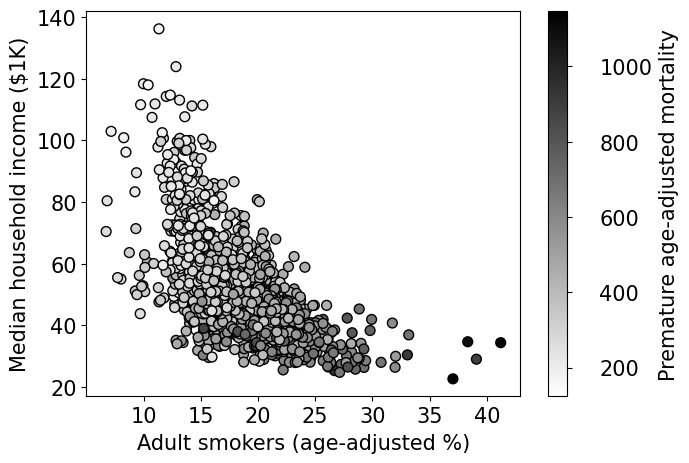

In [10]:
fig = plt.figure(figsize = (7,5)) 
im =plt.scatter(smoking,income,c=premature_mortality,s=50,cmap="gray_r",edgecolors='black',rasterized=True)
cbar = plt.colorbar(im,shrink=1)
cbar.ax.tick_params(labelsize=font_size_ticks,pad = 20)
cbar.set_label(label='Premature age-adjusted mortality',fontsize=font_size,labelpad = 5)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Adult smokers (age-adjusted %)',fontsize=font_size,labelpad = 5)
plt.ylabel('Median household income ($1K)',fontsize=font_size,labelpad = 5);

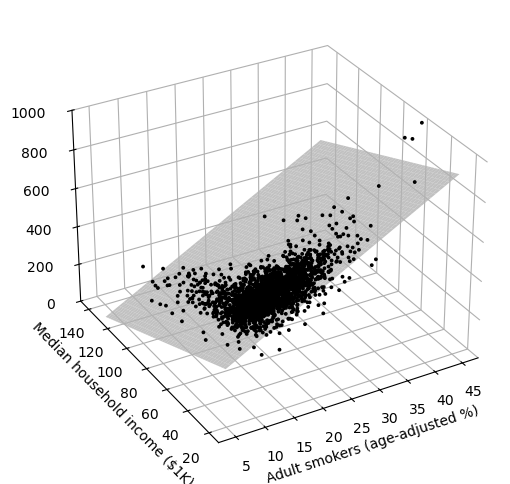

In [11]:
font_size_3D = 10

min_smoking = 5
max_smoking = 45
min_income = 20
max_income = 140
smoking_pred = np.linspace(min_smoking, max_smoking, 50)  
income_pred = np.linspace(min_income, max_income, 50)  

aux_smoking, aux_income = np.meshgrid(smoking_pred, income_pred)
model_input = np.array([aux_smoking.flatten(), aux_income.flatten()]).T

prediction = linear_model.predict(model_input)
reshaped_prediction = prediction.reshape(aux_smoking.shape)

fig = plt.figure(figsize = (9,6)) 
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.plot_surface(aux_smoking, aux_income,reshaped_prediction, color='lightgray', alpha=0.8,
               rstride=1,cstride=1)
ax.scatter(smoking.tolist(), income.tolist(), premature_mortality.tolist(),c='black', marker='o', alpha=1,s=3)
plt.xticks(fontsize=font_size_3D) 
plt.yticks(fontsize=font_size_3D)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(font_size_3D)
for t in ax.zaxis.get_major_ticks(): t.label1.set_horizontalalignment("right")
plt.xlabel('Adult smokers (age-adjusted %)',fontsize=font_size_3D,labelpad = 2)
plt.ylabel('Median household income ($1K)',fontsize=font_size_3D,labelpad = 2)
ax.view_init(elev=30, azim=-120)
ax.set_zlim(0, 1000)
ax.dist = 10.5;

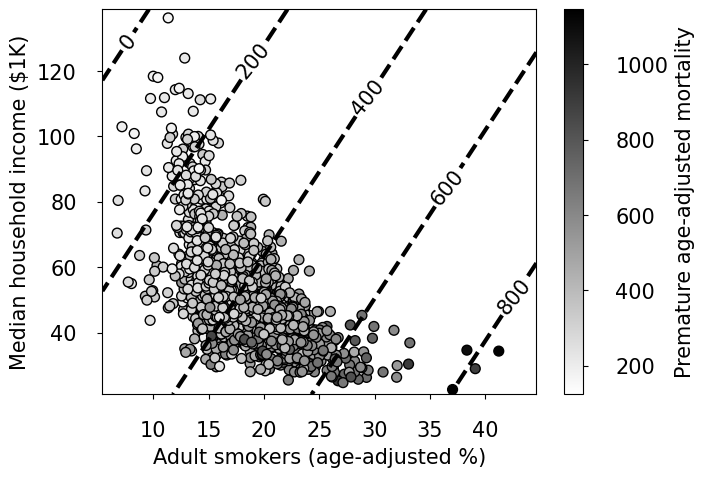

In [12]:
v_max = np.max(premature_mortality)
v_min = np.min(premature_mortality)
fig = plt.figure(figsize = (7,5)) 
sc = plt.scatter(smoking,income,c=premature_mortality,s=50,cmap="gray_r",edgecolor='black',vmax = v_max,vmin = v_min,
            rasterized=True)
CS = plt.contour(reshaped_prediction,colors="black", extent=[min_smoking, max_smoking,min_income,max_income], 
                origin='lower',linewidths=3,linestyles="dashed",levels=4)
manual_locations = [(8, 128), (20, 120), (30, 110), (35, 90), (43, 50)]
plt.clabel(CS, fontsize=font_size_ticks, inline=1,fmt = '%1.0f',manual =manual_locations)#,ticks=Contourrange)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
ax = plt.gca()
ax.tick_params(axis='both', which='major', pad=15)
cbar = plt.colorbar(sc,shrink=1)
cbar.ax.tick_params(labelsize=font_size_ticks,pad = 20)
cbar.set_label(label='Premature age-adjusted mortality',fontsize=font_size,labelpad = 5)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel('Adult smokers (age-adjusted %)',fontsize=font_size,labelpad = 5)
plt.ylabel('Median household income ($1K)',fontsize=font_size,labelpad = 5);

In [13]:
predictions = linear_model.predict(X)
errors = premature_mortality - predictions
variance_response = np.var(premature_mortality)
variance_predictions = np.var(predictions)
variance_errors = np.var(errors)
print("Variance of the response: ",round(variance_response,1))
print("Variance of the predictions: ",round(variance_predictions,1))
print("Variance of the errors: ",round(variance_errors,1))
print("R squared: ",round(variance_predictions/variance_response,3))
# We compare to the coefficient of determination of models that use a single feature
# For such models the coefficient of determiniation is just the squared sample correlation coefficient
print("R2 for just tobacco use: " + str(round(np.corrcoef( smoking, premature_mortality)[0][1]**2,3))) 
print("R2 for just household income: " + str(round(np.corrcoef( income, premature_mortality)[0][1]**2,3)))

Variance of the response:  13456.0
Variance of the predictions:  8004.3
Variance of the errors:  5451.7
R squared:  0.595
R2 for just tobacco use: 0.512
R2 for just household income: 0.437


In [14]:
X_tobacco = np.array([smoking]).T

linear_model_tobacco = LinearRegression().fit(X_tobacco, premature_mortality)
print("Coefficient: " + str(round(linear_model_tobacco.coef_[0],2)))
print("Intercept: " + str(round(linear_model_tobacco.intercept_,3)))

Coefficient: 22.52
Intercept: 1.792


In [15]:
X_income = np.array([income]).T

linear_model_income = LinearRegression().fit(X_income, premature_mortality)
print("Coefficients: " + str(round(linear_model_income.coef_[0],3)))
print("Intercept: " + str(round(linear_model_income.intercept_,2)))

Coefficients: -5.571
Intercept: 692.03
